
Top 5 Keywords by Order:
      Unnamed: 0            keyword   view   menu  checkout  order
41            41    chinese chicken  45939  17135     11108   1105
3746        3746     avocado burger  49499  18921     11785   1101
2845        2845      mango chutney  49022  18199     11972   1089
432          432  grilled eel sushi  48235  17799     12150   1086
2508        2508    kacang panggang  42705  16972     10840   1066

Matched items: 420
                 keyword              item_name  order  item_price cuisine_tag
0     fried spring rolls     Fried Spring Rolls    153        3.50        Side
1      lumpiang shanghai      Lumpiang Shanghai    101        4.25        Side
2      thai spring rolls      Thai Spring Rolls    796        3.50        Side
3  general tso’s chicken  General Tso’s Chicken     22        9.50       Asian
4       kung pao chicken       Kung Pao Chicken    141        9.25       Asian

Cuisine Performance:
                  view    menu  checkout  order
cuisine_

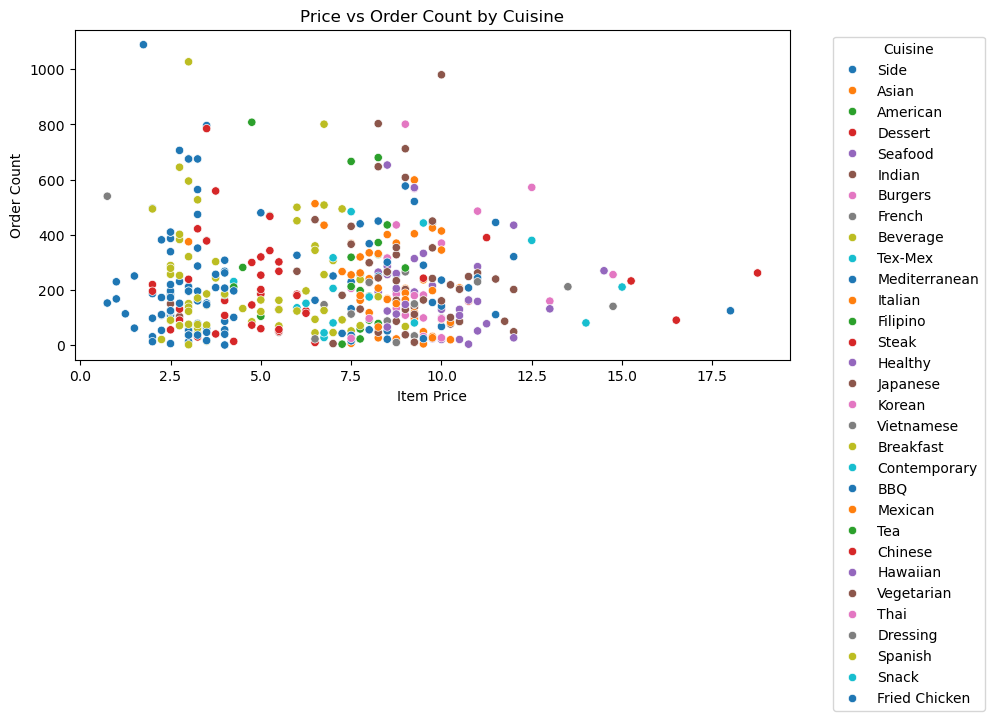

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

keywords_df = pd.read_csv('keywords.csv')
items_df = pd.read_csv('items.csv')

print("\nTop 5 Keywords by Order:")
print(keywords_df.sort_values(by='order', ascending=False).head())


# Normalize item names for basic match
keywords_df['keyword_lower'] = keywords_df['keyword'].str.lower()
items_df['item_name_lower'] = items_df['item_name'].str.lower()

# Inner merge (exact string match on lower-case names)
merged_df = pd.merge(keywords_df, items_df, left_on='keyword_lower', right_on='item_name_lower', how='inner')

print(f"\nMatched items: {len(merged_df)}")
print(merged_df[['keyword', 'item_name', 'order', 'item_price', 'cuisine_tag']].head())

cuisine_stats = merged_df.groupby('cuisine_tag')[['view', 'menu', 'checkout', 'order']].sum().sort_values(by='order', ascending=False)
print("\nCuisine Performance:")
print(cuisine_stats)

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='item_price', y='order', hue='cuisine_tag', palette='tab10')
plt.title('Price vs Order Count by Cuisine')
plt.xlabel('Item Price')
plt.ylabel('Order Count')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.75)
plt.tight_layout()
plt.savefig('price_vs_order.png')

merged_df.to_csv('merged_keyword_item_data.csv', index=False)